# Ikeda-based nonlinear delayed dynamics for application to secure optical transmission systems using chaos
References: 

[Ikeda-based nonlinear delayed dynamics for application to secure optical transmission systems using chaos, L. Larger, C.R. Physique 5 (2004)](https://www.sciencedirect.com/science/article/pii/S1631070504001045)

[Optoelectronic oscillators with time-delayed feedback, L. Larger et al., Rev. Mod. Phys. 91, 035006 (2019)](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.91.035006)

[Using Synchronization for Prediction of High-Dimensional Chaotic Dynamics, R. Roy et al., Phys. Rev. Lett. 101, 154102 (2008)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.101.154102) ${\rightarrow}$ Professor likes this paper

William's Lecture note

Feliciano's Lecture note

----
## 1. Introduction

We are going to explore a nonlinear delayed differential equations (NLDDEs) using python. NLDDEs is an important dynamical system because it can generate a highly chaotic dynamical system for encryption and .... 

## 2. Experimental Motivation

As a physicist, it is always wise to start 
It would be best if you can add the experimental motivation that why people are interested in this time delayed system and the actual implementation.


## 3. Theory
Nonlinear delay differential dynamics exhibit extremely complex chaotic behavior (with arbitrarily high attractor dimension), with a simple first order scalr differential equation,

$$
y(t) + {\tau}\frac{dy(t)}{dt} = {\beta}f[y(t-{\tau}_R)].
$$

+ The left hand side is a stable linear first order dynamics, with a response time ${\tau}$; its role is only to limit the fastest oscillations time scale.
+ The function $f[...]$ at the right hand side contains a nonlinear function applied to the delayed dynamical variable $y(t-{\tau}_R)$.
+ The delay forces the dynamical phase space to be infinite dimensional: instead of a single initial condition, the system requires an infinite number of values
+ ${\beta}$ is a weight of the nonlinear delayed feedback, usually considered as the bifurcation parameter.
+ The nonlinear function, $f[...]$ can be approximated by a polynomial function of order N: for example, when $N=2$, the dynamical system is the well known logistic map.
+ The nonlinear transformation, and the delay are the key element to generate a high dimensional chaotic process. 

### 1) Adiabatic case in the case of large delays (${\tau}_R > {\tau} {\approx} 0$): why the nonlinear function?
Then the dynamical system is reduced to $y_{n+1} = {\beta}f(y_{n})$. The feedback is then equivalent to an iteration process, returing the vertical axis value $y_{n+1}$ onto the horizontal axis. This feedback operation can be represented graphically with the first bisector straightline, which intersects the nonlinear function at the steady state value (defined as the solution of $y_{s} = {\beta}f(y_{s})$). This state is stable if the absolute value of the slope $f'(y_{s})$ is lower than 1, otherwise it is unstable. This is why ${\beta}$ is considered as a bifurcation parameter of the system. When incresing ${\beta}$, the steady state loses their stability and periodic regimes are oberseved. If you increase it more, then the high complexity chaotic regimes are observed.

When $N = 2$, parabolic case (logistic map), it has been shown that a limited complexity only can be obtained for the large ${\beta}$ value. That is why the Ikeda model with its multiple extrema nonlinear function is a good candidate for the chaos generation.


### 2) Non-zero response time ${\tau}$: better chaos by a non-zero response time ${\tau}$ and the system is no longer discrete
The dynamics is no longer a discrete mapping, it has to fluctuate continuously in time. Also, the dimension of the phase space increases from 1 to infinity. The Lyapunov dimension is in the linear dependence with the ratio ${\tau_R}/{\tau}$ and ${\beta}$.

In conclusion, Ikeda-based dynamics must involve a nonlinear function ${f(y)}$ with a high number of extrema (typically $N > 5$) with the appropriate ${\tau_R}/{\tau}$ ratio.

----
----

# Ideas & Questions
0. What should we use to solve the equation? Just RK45? ${\rightarrow}$ William recommended DDE23
1. Make a superclass, and implement all the analysis tools including the plots.
2. In the subclass, I can implement the logistic maps, ikeda maps, and other high order polynomials.
3. For the polynomials, we can do the taylor expansion and slowly increase the number $N$ and see what happens/make a plot to compare it directly.
4. Compare the continuous case and the discretized case.

---
---
# Professor's comment
### Nov. 14. 2022
1. Solving nonlinear delay equation euqation itself can be a challenge. Also, the solutions for the discrete and the continuous  method can be different. Thus, comparing those two solutions using the Lyapunov exponent and the bifurcation diagram is crucial to our project.
2. We have to figure out what the discrte expression of the ikeda map is. Then, solve the eqation.
3. For the continuous solution, professor recommended DDE23 for the differential equation solver. 


---
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ddeint import ddeint

## Main Class for the code. Still trying to integrate everythin

In [2]:
class IkedaEquation:
    """
    Differential Equation with the nonlinear delay feedback
    (from the paper above)
    
    Parameters
        beta = weight of the nonlinear feedback
        tau = response time
        delay = magnitude of the delay
    """
    def __init__(self, beta, tau, delay, ic):
        self.beta = beta
        self.tau = tau
        self.delay = delay
        self.ic = ic
        
    def __call__(self, t, y):
        return self.rhs(t, y)
    
    def rhs(self, t, y):
        return (self.beta/self.tau) * ((np.sin(y(t - self.delay)))**2) - y(t)/self.tau
    
    def values_before_zero(self, t):
        return self.ic
    
    def solve(self, t_min, t_max, nt):
        """
        Solve the logistic equation using the ddeint solver based on scipy
        
        """
        tpts = np.linspace(t_min, t_max, nt)
        sol = ddeint(self.rhs, self.values_before_zero, tpts)
        return tpts, sol
    
            
    # def solve_nodelay(self, ic, t_min, t_max, nt, **kwargs):
    #     """
    #     Solve the logistic equation using the odeint solver in scipy
        
    #     """
    #     tpts = np.linspace(t_min, t_max, nt)
    #     out = solve_ivp(self.rhs, (t_min, t_max), ic, t_eval=tpts, **kwargs)
    #     sol = out.y.T
    #     tpts =  out.t
    #     return tpts, sol
    
    
  
class LogisticEquation:
    """
    Logistic equation, which is dy/dx = (b-cx)x
    (from Feliciano's lecture note)
    
    Parameters
        b = weight of the nonlinear feedback
        c = response time
        
    """
    def __init__(self, b, c):
        self.b = b
        self.c = c
        
    def __call__(self, t, X):
        return self.rhs(t, X)
    
    def rhs(self, t, X):
        """
        RHS of the logistic equation in a differential equation form
        
        """
        y = X
        ydot = (self.b-self.c*y)*y
        return np.array([ydot])
    
    def solve(self, ic, t_min, t_max, nt, **kwargs):
        """
        Solve the logistic equation using the odeint solver in scipy
        
        """
        tpts = np.linspace(t_min, t_max, nt)
        out = solve_ivp(self.rhs, (t_min, t_max), ic, t_eval=tpts, **kwargs)
        sol = out.y.T
        tpts =  out.t
        return tpts, sol

## Boring Logistic maps

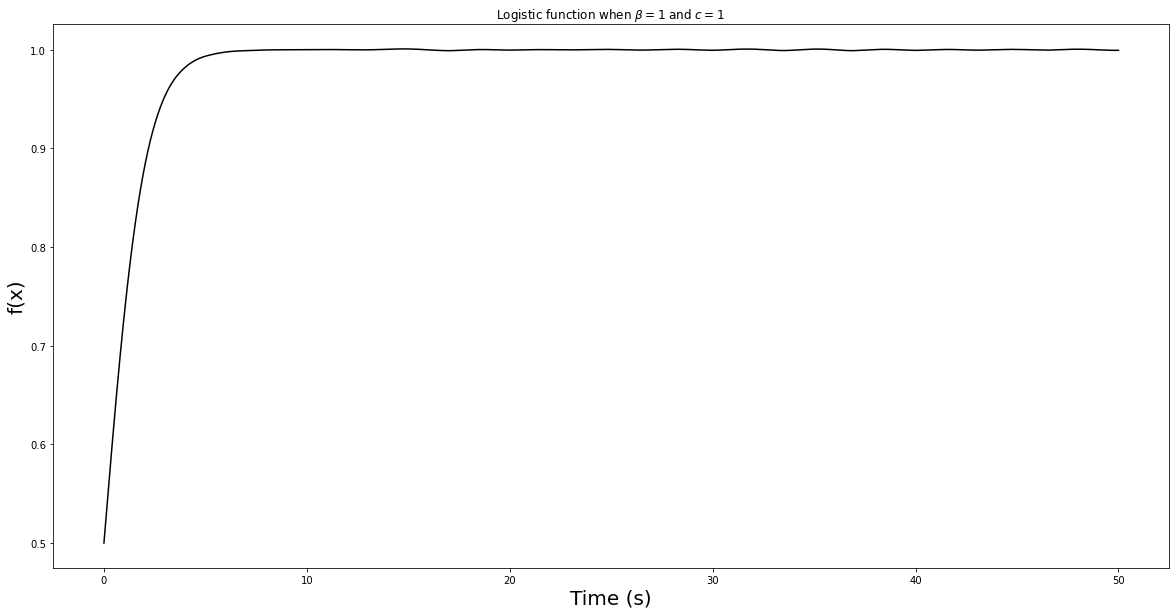

In [65]:
logistic_model = LogisticEquation(b=1, c=1)
ic = [0.5]  ## Initial condition
tpts, sol = logistic_model.solve(ic, 0, 50, 10000)


plt.figure(figsize=(20, 10))
plt.title(rf'Logistic function when $\beta = {logistic_model.b}$ and $ c = {logistic_model.c}$ ')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(tpts, sol, color='k')

## Interesting Nonlinear Delay Differential Equation system

### Could Make an interactive video using ipywidgets

/Users/inhwankim/miniconda3/envs/cphy/lib/python3.9/site-packages/ddeint/ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


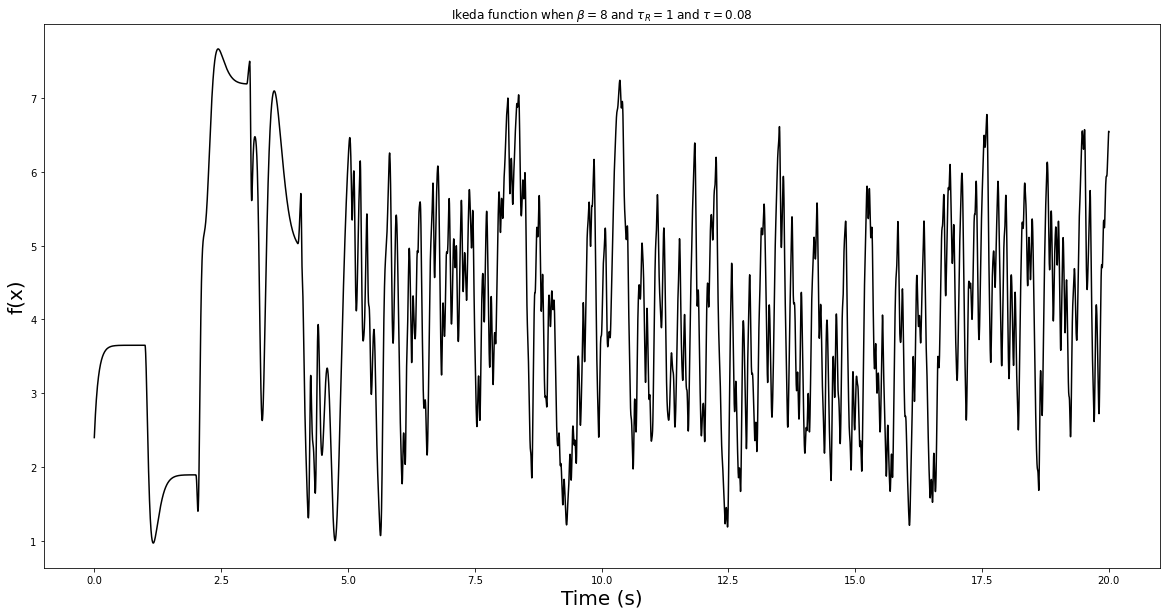

In [78]:
ic = 2.4 ## initial condition
delay = 1 ## delay time
beta = 8 ## intensity of nonlinear function
tau = 0.08  ## response time

def values_before_zero(t):
    return ic

def model(y, t):
    return (beta/tau)*(np.sin(y(t - delay))**2) - y(t)/tau

def solve(t_min, t_max, nt):
    tpts = np.linspace(t_min, t_max, nt)
    sol = ddeint(model, values_before_zero, tpts)
    return tpts, sol

tpts, sol = solve(0, 20, 10000) ## time input

plt.figure(figsize=(20, 10))
plt.title(rf'Ikeda function when $\beta = {beta}$ and $\tau_R={delay}$ and $\tau={tau}$')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(tpts, sol, color='k')

In [56]:
print(sol)
print(np.reshape(sol, (10000, 1)))

[2.501 array([2.50813436]) array([2.51526871]) ... array([3.86744605])
 array([3.94787706]) array([4.02797842])]
[[2.501]
 [array([2.50813436])]
 [array([2.51526871])]
 ...
 [array([3.86744605])]
 [array([3.94787706])]
 [array([4.02797842])]]


## Still having an error when I make a Class for the ikeda solver, I'm gonna ask professor for help

In [ ]:
### Trying to make a class, but not working

ikeda_model = IkedaEquation(beta=4, tau=1, delay=1, ic=0.5)
# ic = 0.5  ## Initial condition
tpts, sol = ikeda_model.solve(0, 20, 1000)

plt.figure(figsize=(20, 10))
# plt.title(rf'No delay Ikeda function when $\beta = {logistic_model.b}$ and $ c = {logistic_model.c}$ ')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(tpts, sol, color='k')

----
# Adam's work - zero response time case and large delays
We can solve it using discontinuous 

In [76]:
class spiderweb:

    def __init__(self, n):
        self.n = n ## number of step for the cobweb plot

    def __call__(self, r):
        return logistic_model(r), ikeda_adiabatic(b, y)
    
    def logistic_model(self, r, x):
        """
        "r" is the only parameter for the logistic maps
        From Feliciano's lecture note

        Args:
            r : 1 + b*time_step 

        Returns:
            function : rhs of the logistic maps
        """
        return r*(1-x)*x
        
    def ikeda_adiabatic(self, b, y):
        """
        "b" is the only parameter for the adiabatic ikeda maps
        From Ikeda-based nonlinear delayed dynamics for application to secure optical transmission systems using chaos, L. Larger, C.R. Physique 5 (2004)

        Args:
            b : the intensity of the non linear function

        Returns:
            function : rhs of the adiabatic ikeda maps
        """
        return b * ((np.sin(y))**2)
    
    def plot_adiabatic_ikeda(self, b, ic, t_min, t_max, tn):
        tpts = np.linspace(t_min, t_max, tn)
        plt.figure(figsize=(10, 10))
        plt.plot(tpts, self.ikeda_adiabatic(b, tpts),'k',lw=2)
        plt.plot([t_min,b],[t_min,b],'k',lw=2)

        
        y = ic
        for i in range(self.n):
            f = self.ikeda_adiabatic(b, y)
            plt.plot([y,y],[y,f],'k',lw=1)
            plt.plot([y,f],[f,f],'k',lw=1)
            plt.plot([y],[f],'ok',ms=10,alpha=(i+1)/self.n)

            y=f
        plt.title(rf'Spider map for the adiabatic Ikeda map when $\beta = {b}$ and $\tau_R=large$ and $\tau={0}$')
        plt.xlabel(r'$x$', fontsize=20)
        plt.ylabel(r'$f(x)$', fontsize=20)
        
    def plot_logistic(self, r, ic, t_min, t_max, tn):
        tpts = np.linspace(t_min, t_max, tn)
        plt.figure(figsize=(10, 10))
        plt.plot(tpts, self.ikeda_adiabatic(b, tpts),'k',lw=2)
        plt.plot([t_min,b],[t_min,b],'k',lw=2)

        
        y = ic
        for i in range(self.n):
            f = self.ikeda_adiabatic(b, y)
            plt.plot([y,y],[y,f],'k',lw=1)
            plt.plot([y,f],[f,f],'k',lw=1)
            plt.plot([y],[f],'ok',ms=10,alpha=(i+1)/self.n)

            y=f
        plt.title(rf'Spider map for the adiabatic Ikeda map when $\beta = {b}$ and $\tau_R=large$ and $\tau={0}$')
        plt.xlabel(r'$x$', fontsize=20)
        plt.ylabel(r'$f(x)$', fontsize=20)

        
        



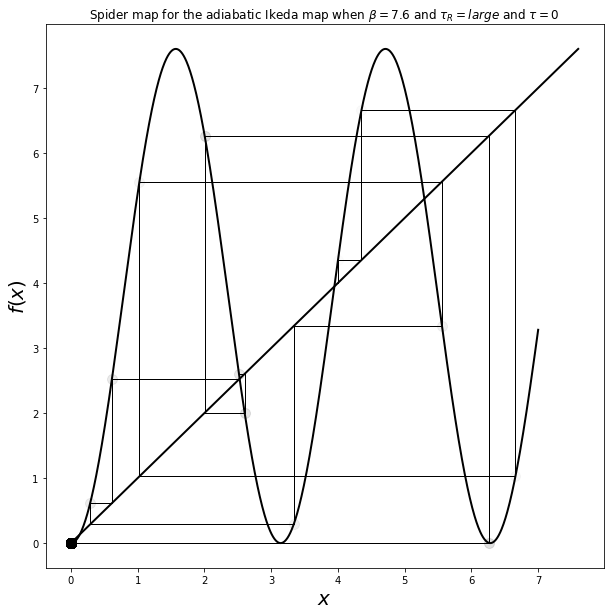

In [99]:
ikeda_adiabatic_model = spiderweb(n = 100)
ikeda_adiabatic_model.plot_adiabatic_ikeda(b = 7.6, ic = 4, t_min = 0, t_max = 7, tn = 1000)

In [83]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def ikeda(b, tau, y):
    return b/tau * ((np.sin(y))**2) - y/tau


def cobweb_plot(b,tau,y0,n,ax=None):
    t = np.linspace(-0,8,100)
    ax.plot(t,ikeda(b,tau,t),'k',lw=2)
    ax.plot([-5,5],[-5,5],'k',lw=2)

    y=y0
    for i in range(n):
        f=ikeda(b,tau,y)
        ax.plot([y,y],[y,f],'k',lw=1)
        ax.plot([y,f],[f,f],'k',lw=1)
        ax.plot([y],[f],'ok',ms=10,alpha=(i+1)/n)

        y=f
    ax.set_xlim(-0,2)
    ax.set_ylim(-0,2)
    ax.set_title(f"$b={b:.1f}, \ y_0={y0:.1f}$")

(0.5, 3.0)

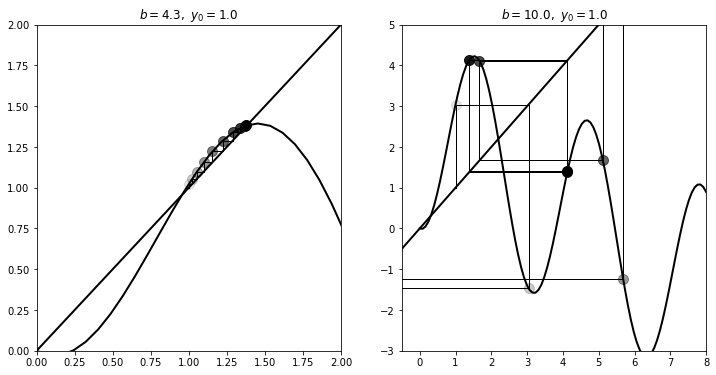

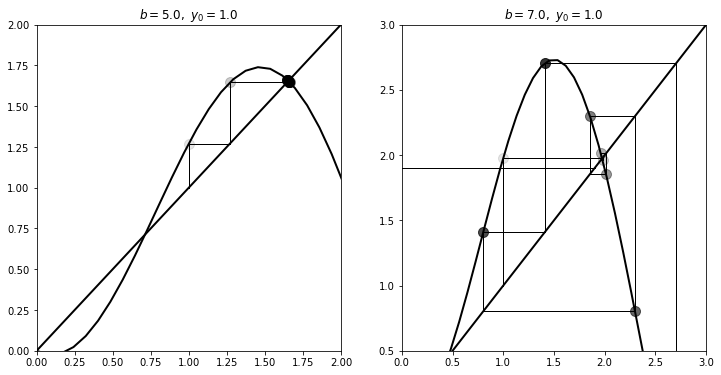

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6),sharey=False)
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(12,6),sharey=False)
cobweb_plot(4.3,2,1,10,ax=ax1)
cobweb_plot(10,2,1,10,ax=ax2)
cobweb_plot(5,2,1,10,ax=ax3)
cobweb_plot(7,2,1,10,ax=ax4)
ax2.set_xlim(-0.5,8)
ax2.set_ylim(-3,5)
ax4.set_xlim(0,3)
ax4.set_ylim(0.5,3)

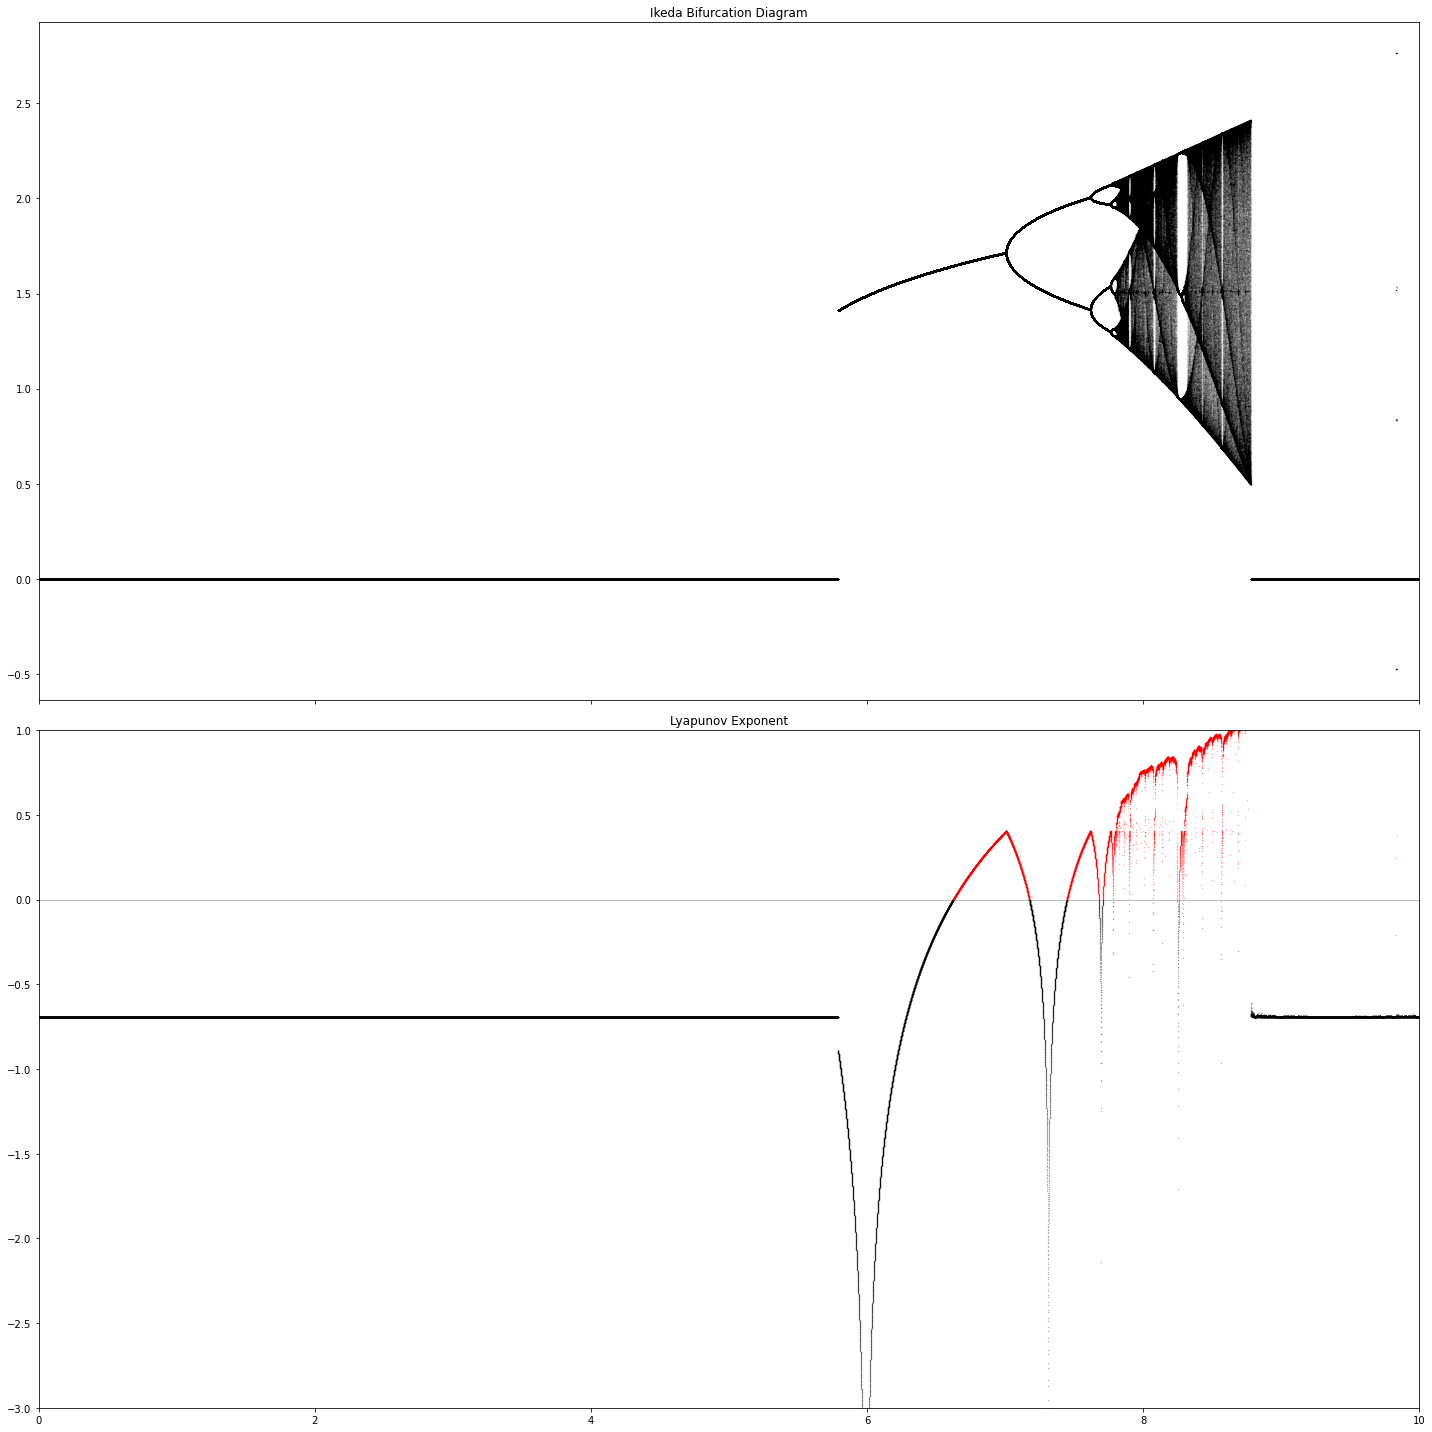

In [80]:
n = 100000
b = np.linspace(0, 10,n)
iterations = 10000
last = 100
tau = 3
y = 2
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20),sharex=True)

for i in range(iterations):
    y = ikeda(b,tau,y)
    lyapunov += np.log(abs(b/2*np.sin(2*y)-1/2))
    if i >= (iterations-last):
        ax1.plot(b,y,'.k', alpha=.25,ms=0.1)
ax1.set_xlim(0, 10)
ax1.set_title("Ikeda Bifurcation Diagram")

ax2.axhline(0, color='k', lw=0.5, alpha=0.5)


ax2.plot(b[lyapunov/iterations<0],lyapunov[lyapunov/iterations<0]/iterations, '.k', alpha=0.5,ms=0.5)

ax2.plot(b[lyapunov/iterations>=0],lyapunov[lyapunov/iterations>=0]/iterations, '.r', alpha=0.5,ms=0.5)


ax2.set_xlim(0, 10)
ax2.set_ylim(-3, 1)

ax2.set_title("Lyapunov Exponent")
plt.tight_layout()

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np


def main(u, points=200, iterations=1000, nlim=20, limit=False, title=True):
    """
    Params
        u:float
            ikeda parameter
        points:int
            number of starting points
        iterations:int
            number of iterations
        nlim:int
            plot these many last points for 'limit' option. Will plot all points if set to zero
        limit:bool
            plot the last few iterations of random starting points if True. Else Plot trajectories.
        title:[str, NoneType]
            display the name of the plot if the value is affirmative
    """
    np.random.seed(0)
    x = 10 * np.random.randn(points, 1)
    y = 10 * np.random.randn(points, 1)
    Xlist = []
    
    for n in range(points):
        X = compute_ikeda_trajectory(u, x[n][0], y[n][0], iterations)
        
        if limit:
            plt.plot(X[-n:, 0], X[-n:, 1])
            tx, ty = 2.5, -1.8
            Xlist.append(X)
            
        else:
            plt.plot(X[:,0], X[:, 1])
            tx, ty = -30, -26
            Xlist.append(X)
    
    plt.title(f"Ikeda Map ({u=:.2g}, {iterations=})") if title else None
    return plt, Xlist


def compute_ikeda_trajectory(u, x, y, N):
    """
    Calculate a full trajectory
    Params
        u:float
            is the ikeda parameter
        x,y float:
            coordinates of the starting point
        N:int
            the number of iterations
    """
    X = np.zeros((N, 2))
    
    for n in range(N):
        X[n] = np.array((x, y))
        
        t = 0.4 - 6 / (1 + x ** 2 + y ** 2)
        x1 = 1 + u * (x * math.cos(t) - y * math.sin(t))
        y1 = u * (x * math.sin(t) + y * math.cos(t))
        
        x = x1
        y = y1   
        
    return X

ulist = np.linspace(0,1,11)
xlist = []
for a in ulist:
    plt.figure()
    plt, Xlist = main(a, nlim=0)
    xlist.append(Xlist)

In [ ]:
from ipywidgets import interact, Layout
import ipywidgets as widgets


def plotter(i):
    plt.figure(figsize=(6, 6))
    plt.plot(xlist[i][:,0], xlist[i][:, 1]);
    plt.xlim([-30, 30])
    plt.ylim([-30, 30])
    plt.axis('off')
    plt.show()

interact(
    plotter, 
    i=widgets.FloatSlider(min=0, max=1, step=11, layout=Layout(width='800px'))
)


In [ ]:
from nolds import examples
import numpy as np

examples.lyapunov-logistic

In [ ]:
l